# Parsers de dependencias

## Requerimientos
- Python 3
- Spacy
- NLTK
- MaltParser
- Stanza

In [1]:
import re
import nltk
import spacy
from nltk import Tree
from spacy import displacy 
from nltk.parse import malt

No poseen distinción entre símbolos no terminales y terminales. Las estructuras representan relaciones de dependencia entre terminales.
Ejemplos de parsers de dependencias:
* [Projective Dependency Parser de NLTK](https://www.nltk.org/_modules/nltk/parse/projectivedependencyparser.html)
* [Maltparser](http://www.maltparser.org/)
* SyntaxNet (Estaba alojado en https://opensource.google.com/projects/syntaxnet, como parte de los recursos de la librería para Inteligencia Artificial TensorFlow de Google, pero en este momento no está disponible y [se rumorea](https://github.com/tensorflow/models/issues/8411) que se lo va a mover al github de [google-research](https://github.com/google-research/google-research))
* [Dependency parser de Spacy](https://spacy.io/usage/linguistic-features#dependency-parse)

## Projective Dependency Parser NLTK

In [10]:
def dep_parser(sentence, grammar):         # define una función llamada dep_parser con dos argumentos
    sentence = sentence.lower()            # convierte a minúscula la oración
    if sentence.endswith('.'):             # si la oración termina con un punto
        sent = re.sub('\.','',sentence)    # se lo quita
    else:                                  # si no
        sent = sentence                    # la toma como está
    sent = sent.split()                    # divide la oración en palabras
    dep_gram = nltk.data.load(grammar, cache=False) # carga la gramática a nltk
    dep_gram = nltk.DependencyGrammar.fromstring(dep_gram) # parsea la gramática como gramática de dependencias
    pdp = nltk.ProjectiveDependencyParser(dep_gram) # aarga la gramática en el parser
    for tree in pdp.parse(sent):           # para cada árbol posible en mi gramática para esa oración
        print(tree)                        # lo imprime
        return(tree)

(explotó pablo (globo el))


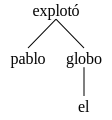

In [67]:
#Para correr el Proyective Dependency Parser

oracion1 = 'Pablo explotó el globo'    # Define la oración a analizar
grammar = 'gramaticas/DG1.txt'        # establece cuál va a ser mi gramática
dep_parser(oracion1, grammar)          # Para correr la función

## Non-Projective Dependency Parser NLTK

In [37]:
def npdep_parser(sentence, grammar):                # define una función llamada dep_parser con dos argumentos
    sentence = sentence.lower()                     # convierte a minúscula la oración
    if sentence.endswith('.'):                      # si la oración termina con un punto
        sent = re.sub('\.',' ',sentence)            # se lo quita
    else:                                           # si no
        sent = sentence                             # la toma como está
    sent = sent.split()                             # divide la oración en palabras
    dep_gram = nltk.data.load(grammar, cache=False) # carga la gramática a nltk
    dep_gram = nltk.DependencyGrammar.fromstring(dep_gram) # parsea la gramática como gramática de dependencias
    pdp = nltk.NonprojectiveDependencyParser(dep_gram) # carga la gramática en el parser
    for tree in pdp.parse(sent):
        print(tree.tree().draw())
    return tree.tree()

None
None


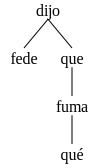

In [39]:
#Para correr el Nonproyective Dependency Parser

#oracion2 = 'quién fuma el cigarrillo'  # Define la oración a analizar
#oracion2 = 'quién dijo fede que fuma'  # Define la oración a analizar
oracion2 = 'qué dijo fede que fuma'  # Define la oración a analizar
# Habría que arreglar la función npdep_parser para que pueda tomar estas dos últimas oraciones
grammar2 = 'gramaticas/DG2.txt'       # establece cuál va a ser mi gramática
npdep_parser(oracion2, grammar2)        # Para correr la función

## PystanfordDependencies

In [41]:
import stanza

In [42]:
#stanza.download('es') # Baja el modelo para el españo

In [43]:
nlp = stanza.Pipeline('es') # Inicializa el modelo de español (con su pipeline de anotación)
nlp

2022-06-14 10:32:26 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| depparse  | ancora  |
| ner       | conll02 |

2022-06-14 10:32:26 INFO: Use device: cpu
2022-06-14 10:32:26 INFO: Loading: tokenize
2022-06-14 10:32:26 INFO: Loading: mwt
2022-06-14 10:32:26 INFO: Loading: pos
2022-06-14 10:32:26 INFO: Loading: lemma
2022-06-14 10:32:26 INFO: Loading: depparse
2022-06-14 10:32:27 INFO: Loading: ner
2022-06-14 10:32:28 INFO: Done loading processors!


In [47]:
doc = nlp("Pablo Neruda escribe poemas en Capri") # Anota una oración
doc

[
  [
    {
      "id": 1,
      "text": "Pablo",
      "lemma": "Pablo",
      "upos": "PROPN",
      "xpos": "PROPN",
      "head": 3,
      "deprel": "nsubj",
      "misc": "start_char=0|end_char=5",
      "ner": "B-PER"
    },
    {
      "id": 2,
      "text": "Neruda",
      "lemma": "Neruda",
      "upos": "PROPN",
      "xpos": "PROPN",
      "head": 1,
      "deprel": "flat",
      "misc": "start_char=6|end_char=12",
      "ner": "E-PER"
    },
    {
      "id": 3,
      "text": "escribe",
      "lemma": "escribir",
      "upos": "VERB",
      "xpos": "VERB",
      "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin",
      "head": 0,
      "deprel": "root",
      "misc": "start_char=13|end_char=20",
      "ner": "O"
    },
    {
      "id": 4,
      "text": "poemas",
      "lemma": "poema",
      "upos": "NOUN",
      "xpos": "NOUN",
      "feats": "Gender=Masc|Number=Plur",
      "head": 3,
      "deprel": "obj",
      "misc": "start_char=21|end_char=27",
      "

In [48]:
print(doc.entities)

[{
  "text": "Pablo Neruda",
  "type": "PER",
  "start_char": 0,
  "end_char": 12
}, {
  "text": "Capri",
  "type": "LOC",
  "start_char": 31,
  "end_char": 36
}]


In [71]:
doc.sentences[0].print_dependencies()

('el', 2, 'det')
('poeta', 4, 'nsubj')
('chileno', 2, 'amod')
('escribe', 0, 'root')
('poemas', 4, 'obj')
('.', 4, 'punct')


In [50]:
doc.sentences[0].dependencies

[({
    "id": 3,
    "text": "escribe",
    "lemma": "escribir",
    "upos": "VERB",
    "xpos": "VERB",
    "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin",
    "head": 0,
    "deprel": "root",
    "misc": "start_char=13|end_char=20"
  },
  'nsubj',
  {
    "id": 1,
    "text": "Pablo",
    "lemma": "Pablo",
    "upos": "PROPN",
    "xpos": "PROPN",
    "head": 3,
    "deprel": "nsubj",
    "misc": "start_char=0|end_char=5"
  }),
 ({
    "id": 1,
    "text": "Pablo",
    "lemma": "Pablo",
    "upos": "PROPN",
    "xpos": "PROPN",
    "head": 3,
    "deprel": "nsubj",
    "misc": "start_char=0|end_char=5"
  },
  'flat',
  {
    "id": 2,
    "text": "Neruda",
    "lemma": "Neruda",
    "upos": "PROPN",
    "xpos": "PROPN",
    "head": 1,
    "deprel": "flat",
    "misc": "start_char=6|end_char=12"
  }),
 ({
    "id": 0,
    "text": "ROOT"
  },
  'root',
  {
    "id": 3,
    "text": "escribe",
    "lemma": "escribir",
    "upos": "VERB",
    "xpos": "VERB",
    "feats": 

In [60]:
doc = nlp("el poeta chileno escribe poemas.")
doc

[
  [
    {
      "id": 1,
      "text": "el",
      "lemma": "el",
      "upos": "DET",
      "xpos": "DET",
      "feats": "Definite=Def|Gender=Masc|Number=Sing|PronType=Art",
      "head": 2,
      "deprel": "det",
      "misc": "start_char=0|end_char=2",
      "ner": "O"
    },
    {
      "id": 2,
      "text": "poeta",
      "lemma": "poeta",
      "upos": "NOUN",
      "xpos": "NOUN",
      "feats": "Gender=Masc|Number=Sing",
      "head": 4,
      "deprel": "nsubj",
      "misc": "start_char=3|end_char=8",
      "ner": "O"
    },
    {
      "id": 3,
      "text": "chileno",
      "lemma": "chileno",
      "upos": "ADJ",
      "xpos": "ADJ",
      "feats": "Gender=Masc|Number=Sing",
      "head": 2,
      "deprel": "amod",
      "misc": "start_char=9|end_char=16",
      "ner": "O"
    },
    {
      "id": 4,
      "text": "escribe",
      "lemma": "escribir",
      "upos": "VERB",
      "xpos": "VERB",
      "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin",
    

In [61]:
doc.entities

[]

In [62]:
doc.sentences[0].print_dependencies()

('el', 2, 'det')
('poeta', 4, 'nsubj')
('chileno', 2, 'amod')
('escribe', 0, 'root')
('poemas', 4, 'obj')
('.', 4, 'punct')


In [57]:
def extraer_entidades(stanza_oracion):
    entidades = [] # Creo una lista vacía donde voy a guardar todas las entidades que encuentre en la oración
    for dependencia in stanza_oracion.dependencies: # Recorro las dependencias
        regidor, relacion, dependiente = dependencia # Las dependencias son tuplas de tres elementos que puedo separar
                                                     # en variables
        if regidor.deprel == "nsubj": # Asumimos que queremos encontrar los sujetos, pero podríamos comparar por PoS
                                      # ¿Cómo?
            entidad = [regidor]       # Creo una lista cuyo miembro inicial es el nucleo de la construccion
            for palabra in stanza_oracion.words: # Vuelvo a recorrer las palabras de la oración para encontrar
                                                 # todos los dependientes del sujeto, sean anteriores o posteriores
                if palabra.head == int(regidor.id): # Si el nucleo/regidor/head de una palabra coincide con el id
                    entidad.append(palabra)         # del núcleo de mi construcción, lo sumo a la lista de la entidad
            entidad = sorted(entidad, key=lambda x: x.id) # Ordeno la lista resultante por su número de id para 
                                                          # mantener la linealidad del texto.
            if entidad not in entidades:            # Chequeo que la entidad ya no exista en mi lista porque
                entidades.append(entidad)           # el regidor puede aparecer en más de una dependencia.
            
    return [" ".join([palabra.text for palabra in entidad]) for entidad in entidades] # Me quedo únicamente con el 
                                                       # texto de cada objeto Word y lo devuelvo unido por entidad

In [58]:
extraer_entidades(doc.sentences[0])

['el poeta chileno']

In [59]:
doc.sentences[0].words[0].head

2

## FreeLing

FreeLing posee su propio server gratuito que disponibiliza el pipeline de la librería. También se puede descargar
y correr como un programa local e incluso cuenta con una implementación en Python. Hoy vamos a probar FreeLing 
en su [demo visual](https://nlp.lsi.upc.edu/freeling/demo/demo.php).

Si hay dudas con el uso de tags de PoS, se pueden revisar rápudamente en esta página: [Descripción del Tagset](https://www.sketchengine.eu/spanish-freeling-part-of-speech-tagset/)

In [64]:
# Sugerencias para probar:
# A las 4 de la tarde tomo leche y como tostadas.
# No tengo más sueño.
# ¿A quién dijiste que viste el sábado?
# Dije que vi a mi tía.
# Pablo Neruda escribe poemas en Capri.
# pablo neruda escribe poemas en capri.

## Malt Parser

A continuación:

- Descargamos Malt Parser en su versión 1.9.2 desde http://maltparser.org/dist/maltparser-1.9.2.tar.gz y lo descomprimimos con el comando `tar`
- El proceso anterior nos tiene que haber creado una carpeta llamada `maltparser-1.9.2`
- Bajamos modelo entrenado engmalt.poly-1.7 de http://www.maltparser.org/mco/english_parser/engmalt.poly-1.7.mco a la carpeta `maltparser-1.9.2`

In [ ]:
# descarga maltparser desde la url indicada en una carpeta llamada maltparser-1.9.2 (la crea)
! wget -qO- http://maltparser.org/dist/maltparser-1.9.2.tar.gz | tar -xvz > /dev/null

# descarga el modelo engmalt.poly-1.7 en la carpeta maltparser-1.9.2
! wget -P maltparser-1.9.2 http://www.maltparser.org/mco/english_parser/engmalt.poly-1.7.mco

- obtenemos el path absoluto a donde está ubicada esta notebook (`os.path.abspath('.')`)
- unimos esa ubicación con el nombre de la carpeta `maltparser-1.9.2` y hacemos lo mismo con ese resultado y el archivo del modelo (`engmalt.poly-1.7.mco`)
- alojamos ambos paths como variables de entorno

In [ ]:
import os

here = os.path.abspath('.')
print('here es: ', here)
maltparser_folder = 'maltparser-1.9.2'

In [ ]:
print(os.getenv('MALT_PARSER'))

In [ ]:
os.environ['MALT_PARSER'] = os.path.join(here, maltparser_folder, '')
os.environ['MALT_MODEL'] = os.path.join(here, maltparser_folder, 'engmalt.poly-1.7.mco')

In [ ]:
print(os.getenv('MALT_PARSER'))

In [ ]:
! echo $MALT_PARSER

In [ ]:
maltParser = nltk.parse.malt.MaltParser(os.getenv('MALT_PARSER'), os.getenv('MALT_MODEL'))

In [ ]:
oracion_malt = 'John saw Mary with her new dress'
stemma = maltParser.parse_one(oracion_malt.split()).tree()
print(stemma)

## Spacy - Dependency parser

**Nota para quien no tenga la MV:**

Antes de correr hay que instalar spacy. Con pip3, eso se puede hacer con el comando 

`pip3 install spacy`

Hay que instalar también es_core_news_sm, un modelo entrenado mediante un corpus del español, con el comando

`python3 -m spacy download es_core_news_sm`

Alternativamente puede probarse de instalar es_core_news_md.

`python3 -m spacy download es_core_news_md`

En ese caso, para correrlo hay que cambiar en el código de abajo `es_core_news_sm` por `es_core_news_md`.

In [ ]:
# Carga el modelo
nlp = spacy.load('es_core_news_sm')

# Procesa la oración
sent = "¿quiénes dijo Juan que estornudaron?"
doc = nlp(sent)

#options = {"compact": True, "bg": "#09a3d5","color": "white", "font": "Source Sans Pro"}
# Visualización
spacy.displacy.render(doc, style="dep")

In [ ]:
def gramaticadependencias(sentence):                # Define la función
    nlp = spacy.load('es_core_news_sm')             # Carga el modelo entrenado
    doc = nlp(sentence)                             # Procesa la oración con el modelo
    displacy.render(doc, style='dep', jupyter=True) # Visualiza

In [ ]:
oracion_spacy = input('Escribí una oración\n')
gramaticadependencias(oracion_spacy)

In [ ]:
nlp = spacy.load('es_core_news_sm')
doc = nlp(oracion5)
root = [token for token in doc if token.head == token][0]
print('| {0:10}| {1:5}| {2:7}| {3:7}| {4:30} |'.format('TEXTO','DEP','N_IZQ','N_DER','ANCESTROS'))
print('|'+'='*69+'|')
for descendant in root.subtree:
    assert root is descendant or root.is_ancestor(descendant)
    print('| {0:10}| {1:5}| {2:7}| {3:7}| {4:30} |'.format(
        descendant.text,
        descendant.dep_,
        descendant.n_lefts,
        descendant.n_rights,
        str([ancestor.text for ancestor in descendant.ancestors])
    )
)